In [15]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Review: Population Distribution and Parameter

- Population: The collection or set of all objects or individuals being studied.

- Parameter: A number that summarizes(or describes) a characteristic of a target population.


In [58]:
music = Table.read_table('music.csv') # We are taking this data set as a population data set.
music

popularity,dance,duration,energy,tempo,valence,genre
0,0.702,890.68,0.563,130.003,0.581,Electronic
0,0.534,168,0.994,130.034,0.0295,Electronic
0,0.744,360,0.86,129.91,0.458,Electronic
0,0.8,418.1,0.826,119.984,0.342,Electronic
0,0.541,100.339,0.803,174.069,0.294,Electronic
0,0.662,352.206,0.513,120,0.452,Electronic
0,0.706,210.027,0.863,120.029,0.258,Electronic
0,0.686,186.714,0.471,89.975,0.173,Electronic
0,0.701,389.13,0.626,120.006,0.305,Electronic
0,0.533,205.714,0.468,125.98,0.11,Electronic


In [59]:
music_bins = np.arange(0, 800, 25)

## Population Probability Distribution of `duration of songs`

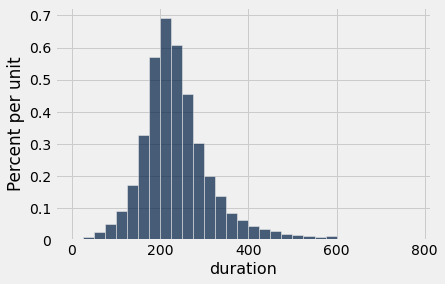

In [21]:
music.hist('duration', bins=music_bins)

## An example of a Population Parameter: The Median `duration of songs`

In [18]:
# (Population) Parameter
np.median(music.column('duration'))

227.53299999999999

## Review: Sample and  Statistic

In the event that all population cannot be accessed for making observations and/or collecting data, we take a random sample from the target population and study its characteritics.

We hope that the sample characteristics gives a reasonably good reflection of the characteristics of the population.

- Sample: A fractional part/subset of the target population.

- Statistic: A number that summarizes(or describes) a characteristic of a sample drawn from a target population.

- A statistic can be used as an estimate of a parameter


In [70]:
# (Sample) Statistic based on sample size n = 10.
np.median(music.sample(10).column('duration')) 

281.17200000000003

In [78]:
# (Sample) Statistic based on sample size n = 100
np.median(music.sample(100).column('duration'))

229.6465

In [92]:
# (Sample) Statistic based on sample size n = 1000
np.median(music.sample(1000).column('duration'))

231.37100000000001

## New Concept Alert

Statistical Inference: Making conclusions/estimating unknowns based on data in random samples


### Empirical Distributions of a Statistic

Empirical distribution of the statistic:
- Based on simulated values of the statistic
- Consists of all the observed values of the statistic, and the proportion of times each value appeared

Good approximation to the probability distribution of the statistic if the number of repetitions in the simulation is large. We will have an update on this soon. Watch out!

In [39]:
# Define a function that returns one simulated value of the statistic

def sample_median(size):
    return np.median(music.sample(size).column('duration'))

In [51]:
sample_median(10)

209.39999999999998

In [52]:
num_simulations = 5000

In [53]:
sample_medians_array = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(10)
    sample_medians_array = np.append(sample_medians_array, new_median)

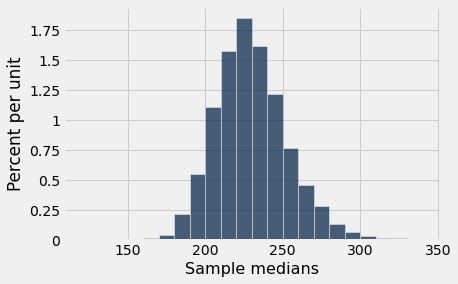

In [54]:
Table().with_column(
    'Sample medians', sample_medians_array
).hist(bins = np.arange(120,350, 10))

#### Empirical Distributions Overlayed

In [55]:
sample_medians_array_10 = make_array()
sample_medians_array_100 = make_array()
sample_medians_array_1000 = make_array()

num_simulations = 5000

for i in np.arange(num_simulations):
    sample_medians_array_10 = np.append(
        sample_medians_array_10, 
        sample_median(10)
    )
    
    sample_medians_array_100 = np.append(
        sample_medians_array_100, 
        sample_median(100)
    )
    
    sample_medians_array_1000 = np.append(
        sample_medians_array_1000, 
        sample_median(1000)
    )

In [56]:
sample_medians = Table().with_columns('Size 10', sample_medians_array_10, 
                                      'Size 100', sample_medians_array_100,
                                      'Size 1000', sample_medians_array_1000)

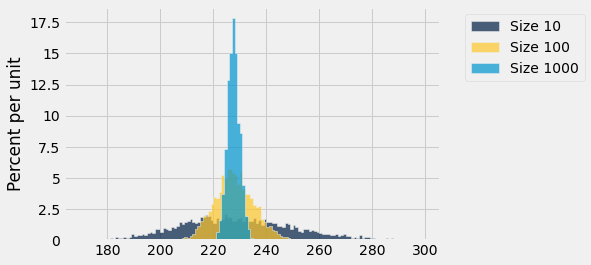

In [57]:
sample_medians.hist(bins = np.arange(170,300, 1))

Update: The empirical distribution of the sample statistic(_the median in this example_) is a good approximation to the probability distribution of the statistic if 

- **the number of repetitions in the simulation is large** and/or 
- **the sample size drawn during each simulation is also large**.

## An Application of Empirical Distributions of Sample Statistic to solving real life problems.

## Testing Hypothesis

A model is a set of assumptions about a data-generating process.

Or we could say that models include assumptions about chance processes used to generate data.

Sometimes, data scientists have to decide whether or not a model is good. We will discuss an example of making such a decision.


## Example 1: Mendel and Pea Flowers 

Context of the problem: Gregor Mendel (1822-1884) was an Austrian monk who is widely recognized as the founder of the modern field of genetics. Mendel performed careful and large-scale experiments on plants to come up with fundamental laws of genetics.

Many of his experiments were on varieties of pea plants. He formulated sets of assumptions about each variety; these were his models. He then tested the validity of his models by growing the plants and gathering data.

For pea plants of a particular variety, Mendel proposed the following model.

_**For every plant, there is a 75% chance that it will have purple flowers, and a 25% chance that the flowers will be white, regardless of the colors in all the other plants.**_

To see whether his model was valid, Mendel grew 929 pea plants of this variety. Among these 929 plants, 705 had purple flowers. This is our observed data(or reality).

Our goal: We will use these data to perform a test of hypotheses and see if Mendel’s model looks good.

## Step 1: Setting up the null and alternative hypotheses for this application problem:

**The null hypothesis:** The assumptions of Mendel's model are good. That is, each plant has a 75% chance of having purple flowers, independent of all other plants.


Facts about the null hypothesis in general:

- This is a clearly defined model about chances. 
- It says that the data were generated at random under clearly specified assumptions about the randomness. 
- The word “null” reinforces the idea that if the observed data look different from what the null hypothesis predicts, the difference is due to nothing but chance.
- From a practical perspective, the null hypothesis is a hypothesis under which you can simulate data.

**The alternative hypothesis:** The alternative hypothesis is simply that his model isn’t good.

Facts about the alternative hypothesis in general:

- This says that some reason other than chance made the data differ from the predictions of the model in the null hypothesis.
- Keep in mind that the alternative doesn’t say how good the model is or why the model isn’t good. It just says the model isn’t good.

## Step 2: Define The Test Statistic and Compute the Observed Value of the Test Statistic

In order to decide between the two hypothesis, we must choose a statistic that we can use to make the decision. This is called the test statistic.

We will be comparing two categorical distributions: 

- the one in Mendel’s model and 
- the one we will get in our random sample(observed data or reality).

We want to see if these two distributions are close to each other or far apart. So our statistic in this example is how far the observed proportion of purple flowers is from the model porportion of purple proportions(75%).


#### Compute the Observed Value of the Test Statistic

The observed value of the test statistic is the value of the statistic you get from the data in the study, not a simulated value. Among Mendel’s 929 plants, 705 had purple flowers. The observed value of the test statistic was therefore

In [239]:
## Mendel had 929 plants, of which 705 had purple flowers(purple or not situation)

percent_observed_purples = (705 / 929) * 100
percent_observed_purples

75.8880516684607

Underlying Reasoning: A sample percent of around 75% will be consistent with the model, but percents much bigger or much less than 75 will make you think that the model isn’t good. 

Therefore, small values of the distance will make you lean towards the null hypothesis. Big values of the statistic will make you lean towards the alternative.

How far is the observed percenatge from the model? This is the observed value of the test statistic.

In [149]:
# The observed value of our test statistic (in percentage)

observed_test_statistic = abs(percent_observed_purples - 75) 
observed_test_statistic

0.8880516684607045

## Step 3: The Distribution of the Test Statistic, Under the Null Hypothesis
The main computational aspect of a test of hypotheses is figuring out what the model in the null hypothesis predicts. Specifically, we have to figure out what the values of the test statistic might be if the null hypothesis were true.

###  Approach to Assessment

- If we can simulate data according to the assumptions of the model, we can learn what the model predicts.
- We can then compare the predictions to the data that were observed(reality).
- If the observed data(reality) and the model’s predictions are not consistent, then there is evidence against the validity of the model.


If the model were true( as specified in the NULL hypothesis), we can simulate random samples by using the function `sample_proportions`. 

- The function is used for sampling at random from a categorical distribution.
- The function samples at random from the population and returns an array containing the distribution of the categories in the sample.


In [203]:
sample_size = 929
mendel_proportions = make_array(0.75, 0.25)
mendel_proportion_purple = mendel_proportions.item(0)
mendel_proportion_purple

0.75

In [213]:
# If the model(assumption in the null hypothesis) were true,

one_simulated_proportion = sample_proportions(929, mendel_proportions).item(0)
one_simulated_proportion

0.7642626480086114

In [214]:
# How far is each simulated percentage/proportion from the model proportion of 75%?

def one_simulated_distance():
    sample_proportion_purple = sample_proportions(929, mendel_proportions).item(0)
    return 100 * abs(sample_proportion_purple - mendel_proportion_purple)

In [187]:
one_simulated_distance()

1.21097954790097

In [217]:
distances = make_array()

for i in np.arange(10_000):
    distances = np.append(distances, one_simulated_distance())

In [222]:
# Predicted percent of purple flowers in sample of 929 IF THE MODEL WERE TRUE.

empirical_dist = Table().with_column(
    'Distance between Sample % and 75%', distances
)
empirical_dist

Distance between Sample % and 75%
0.188375
1.80301
0.565124
0.349839
0.941873
0.888052
0.672766
0.511302
1.42626
1.15716


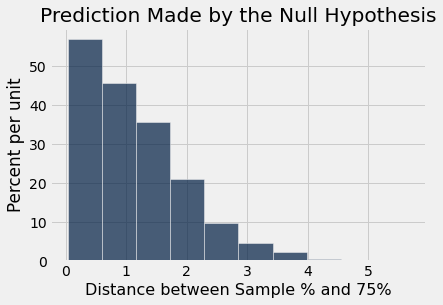

In [223]:
empirical_dist.hist()
plots.title('Prediction Made by the Null Hypothesis');

Remember...

Underlying Reasoning: A sample percent of _around_ 75%(or distance of 0 from 75%) will be consistent with the model, but percents much bigger or much less than 75(absolute difference value bigger than 0) will make you think that the model isn’t good. 

**Therefore, small values of the distance will make you lean towards the null hypothesis. Big values of the statistic will make you lean towards the alternative.**

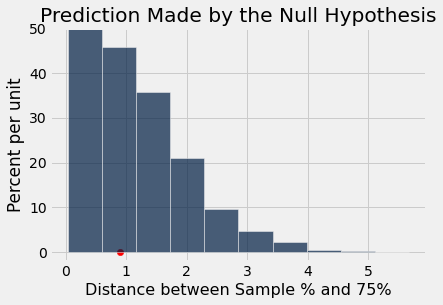

In [233]:
empirical_dist.hist()
plots.ylim(-0.02, 0.5)
plots.title('Prediction Made by the Null Hypothesis')
plots.scatter(observed_test_statistic, 0, color='red', s=40);

Is the sample observation(red dot in the histogram above) based on the new variety of plants consistent with the predictions in the histogram, or not?

Now the answer is not so clear. It depends on whether you think the red dot is too far from the bulk of the predicted values to be consistent with the prediction based on Mendel’s model.

## Step 4. The Conclusion of the Test

The choice between the null and alternative hypotheses depends on the comparison between what you computed in Steps 2 and 3: the observed value of the test statistic and its distribution as predicted by the null hypothesis.

If the two are not consistent with each other, then the data do not support the null hypothesis. In other words, the alternative hypothesis is better supported by the data. We say that the test rejects the null hypothesis.

If the two are consistent with each other, then the observed test statistic is in line with what the null hypothesis predicts. In other words, the null hypothesis is better supported by the data. We say that the data are consistent with the null hypothesis.

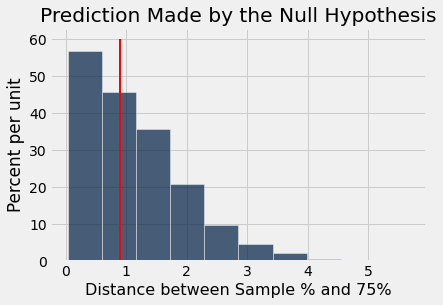

In [235]:
empirical_dist.hist()
plots.title('Prediction Made by the Null Hypothesis')
plots.plot([observed_test_statistic, observed_test_statistic], [0, .6], color='red', lw=2);

In [236]:
p_value = empirical_dist.where(
    'Distance between Sample % and 75%', 
    are.above_or_equal_to(observed_test_statistic)
).num_rows / 10000

p_value

0.5409

**Definition: The p-value of a test is the chance, based on the model in the null hypothesis, that the test statistic will be equal to the observed value in the sample or even further in the direction that supports the alternative.**

If a p-value is small, that means the tail beyond the observed statistic is small and so the observed statistic is far away from what the null predicts. This implies that the data support the alternative hypothesis more than they support the null.

How small is “small”? According to the conventions:

- If the p-value is less than 5%, it is considered small and the result is called “statistically significant.”

- If the p-value is even smaller – less than 1% – the result is called “highly statistically significant.”


By this convention, our p-value of is considered large. So the conventional conclusion would be to fail to reject the null hypothesis and say that Mendel’s model looks good for the new plants. Formally, the result of the test is not statistically significant.

Note that we could have alternatively computed out p-value in the following way:

In [238]:
repetitions = 10_000
np.count_nonzero(distances >= observed_test_statistic) / repetitions

0.5409